# CSC-345

## Coursework -> Object Recognition -> Using Convolutional Neural Network

### Radoslav Nikolov - 974054 December 2020

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import skimage.feature
from sklearn import metrics
from keras.constraints import maxnorm
import seaborn as sn

### Loading and preparing the data for the shallow and deep convolutional neural network models

* `to_categorical()` -> used to apply one-hot encoding to the integer representation of the given labels for the images and replaces each unique integer value with a corresponding binary value, which creates a binary matrix representation of the input as output. 

In [4]:
#Loading the given data of images
trn_images = np.load('trnImage.npy')
trn_labels = np.load('trnLabel.npy')
tst_images = np.load('tstImage.npy')
tst_labels = np.load('tstLabel.npy')

#Outputing the shape of the training and testing data
print(trn_images.shape)
print(trn_labels.shape)
print(tst_images.shape)
print(tst_labels.shape)

#Transpose the training and testing datasets shape to put the number of samples in the beginning
trn_images = np.transpose(trn_images, (3, 0, 1, 2))
tst_images = np.transpose(tst_images, (3, 0, 1, 2))

#Making the data float type because the data is currently integers
trn_images = trn_images.astype('float32')
tst_images = tst_images.astype('float32')

#Normalisation of the data to values between 0.0 to 1.0
trn_images = trn_images/255.0
tst_images = tst_images/255.0

#One-hot encoding the data first before it is used by the neural network
trn_labels = tf.keras.utils.to_categorical(trn_labels)
tst_labels = tf.keras.utils.to_categorical(tst_labels)
number_class = tst_labels.shape[1]

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)


### Creating, compiling and training the <font color='red'>shallow convolutional neural network model</font>
#### Also, the output will show the accuracy and loss curves of the training and validation data
* `Conv2D()` - layer, known as a feature extractor, which uses a filter that passes over an image, scanning a few pixels at a time and creating a feature map that predicts the class to which each feature belongs.
* `MaxPooling2D()` - layer that is used between the convolutional layers to reduce the computation expenses by returning the maximal value from a slice of the image chunk.
* `Dropout()` - the idea behind this layer is to randomly drop units alongside with their connections from the convolutional neural network during training. The reduction of parameters in each step of training has effect of regularization, which has an effect on the performance of the network. 
* `BatchNormalization()` - normalizes the activation of the previous layer at each batch by applying a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It also acts as a regularizer.
* `kernel_constraint=maxnorm()` - constrains the weights incident to each hidden unit to have a norm less than or equal to a desired value. It is another form of regularizating the data as it learns, which also helps prevent overfitting.

Epoch 1/35
157/157 [==============================] - 57s 362ms/step - loss: 2.1541 - categorical_accuracy: 0.2661 - val_loss: 2.3259 - val_categorical_accuracy: 0.1000
Epoch 2/35
157/157 [==============================] - 49s 309ms/step - loss: 1.8174 - categorical_accuracy: 0.3600 - val_loss: 2.4023 - val_categorical_accuracy: 0.1000
Epoch 3/35
157/157 [==============================] - 46s 296ms/step - loss: 1.6659 - categorical_accuracy: 0.4068 - val_loss: 2.6015 - val_categorical_accuracy: 0.1070
Epoch 4/35
157/157 [==============================] - 47s 299ms/step - loss: 1.5652 - categorical_accuracy: 0.4416 - val_loss: 2.5724 - val_categorical_accuracy: 0.1570
Epoch 5/35
157/157 [==============================] - 48s 303ms/step - loss: 1.4716 - categorical_accuracy: 0.4693 - val_loss: 3.2023 - val_categorical_accuracy: 0.1270
Epoch 6/35
157/157 [==============================] - 48s 306ms/step - loss: 1.3875 - categorical_accuracy: 0.4986 - val_loss: 2.2516 - val_categorical_acc

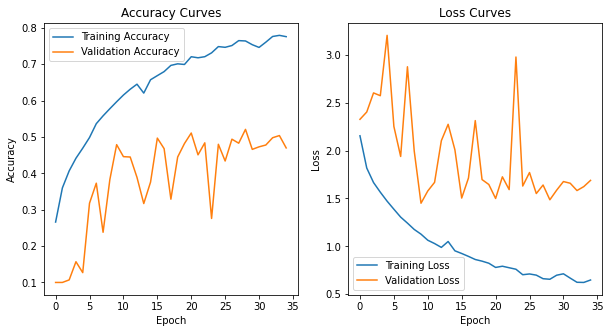

In [5]:
#Creating an instance of the Sequential class, passing the constructor a list of the layers
modelS = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(32, [3,3], input_shape=(32,32,3),activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64, [3,3], activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, kernel_constraint=maxnorm(3), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, kernel_constraint=maxnorm(3), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(number_class, activation=tf.nn.softmax)])

#Compile the model by passing in values for the arguments optimizer(Adam), loss(CategoricalCrossentropy), and metrics(CategoricalAccuracy).
modelS.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=tf.keras.metrics.CategoricalAccuracy())

#Training the model with the training dataset
historyS = modelS.fit(trn_images, trn_labels, validation_data=(tst_images, tst_labels), epochs=35, batch_size=64)

#Plotting the accuracy and loss curves of the training and validation data
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(historyS.history['categorical_accuracy'])
plt.plot(historyS.history['val_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(historyS.history['loss'])
plt.plot(historyS.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Evaluation of the created <font color='red'>shallow</font> model on the training and testing data, and displaying the confusion matrix


Accuracy on train data: 0.7547000050544739% 
 Error on train data: 0.24529999494552612

Accuracy on test data: 0.4699999988079071% 
 Error on test data: 0.5300000011920929



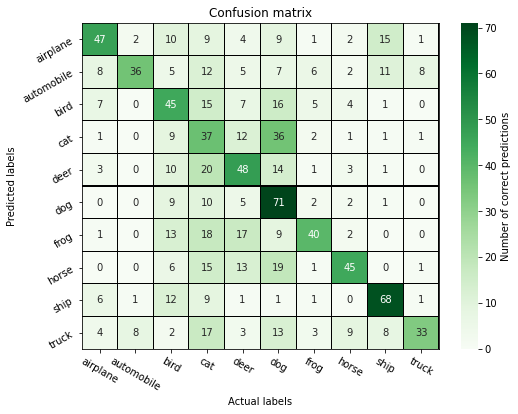


              precision    recall  f1-score   support

           0       0.61      0.47      0.53       100
           1       0.77      0.36      0.49       100
           2       0.37      0.45      0.41       100
           3       0.23      0.37      0.28       100
           4       0.42      0.48      0.45       100
           5       0.36      0.71      0.48       100
           6       0.65      0.40      0.49       100
           7       0.64      0.45      0.53       100
           8       0.64      0.68      0.66       100
           9       0.73      0.33      0.46       100

    accuracy                           0.47      1000
   macro avg       0.54      0.47      0.48      1000
weighted avg       0.54      0.47      0.48      1000



In [13]:
#Evaluation of the training data which outputs the overall accuracy of the training dataset
scoresS = modelS.evaluate(trn_images, trn_labels, batch_size=64, verbose=0)
print("")
print('Accuracy on train data: {}% \n Error on train data: {}'.format(scoresS[1], 1 - scoresS[1]))

#Evaluation of the testing data which outputs the overall accuracy of the testing dataset
scoresS2 = modelS.evaluate(tst_images, tst_labels, batch_size=64, verbose=0)
print("")
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scoresS2[1], 1 - scoresS2[1]))

#Using the trained shallow model to predict the categories of the testing images
pred_testS= modelS.predict(tst_images)

#Creating and displaying the confusion matrix using heatmap
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cfmxS = metrics.confusion_matrix(tst_labels.argmax(axis=1), pred_testS.argmax(axis=1), labels=[0,1,2,3,4,5,6,7,8,9])
print("")
plt.figure(figsize=(8,6))
mapS = sn.heatmap(cfmxS, linewidths=0.1, linecolor='Black', xticklabels=label_names, yticklabels=label_names, annot=True, cmap='Greens', cbar_kws={'label': 'Number of correct predictions'})
mapS.set_xticklabels(mapS.get_xticklabels(), rotation=-30)
mapS.set_yticklabels(mapS.get_yticklabels(), rotation=30)

#Going through each side of the frame of the heatmap and set the frame on
for _, spine in mapS.spines.items():
    spine.set_visible(True)

plt.title('Confusion matrix')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.show()

#Dispaying the classification report for the testing dataset
print("")
print(metrics.classification_report(tst_labels.argmax(axis=1), pred_testS.argmax(axis=1), labels=[0,1,2,3,4,5,6,7,8,9]))

### Creating, compiling and training the <font color='red'>deep convolutional neural network model</font>
#### Also, the output will show the accuracy and loss curves of the training and validation data
* `Conv2D()` - layer, known as a feature extractor, which uses a filter that passes over an image, scanning a few pixels at a time and creating a feature map that predicts the class to which each feature belongs.
* `MaxPooling2D()` - layer that is used between the convolutional layers to reduce the computation expenses by returning the maximal value from a slice of the image chunk.
* `Dropout()` - the idea behind this layer is to randomly drop units alongside with their connections from the convolutional neural network during training. The reduction of parameters in each step of training has effect of regularization, which has an effect on the performance of the network. 
* `BatchNormalization()` - normalizes the activation of the previous layer at each batch by applying a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It also acts as a regularizer.
* `kernel_constraint=maxnorm()` - constrains the weights incident to each hidden unit to have a norm less than or equal to a desired value. It is another form of regularizating the data as it learns, which also helps prevent overfitting.

Epoch 1/35
157/157 [==============================] - 52s 331ms/step - loss: 2.1597 - categorical_accuracy: 0.2646 - val_loss: 3.7190 - val_categorical_accuracy: 0.1000
Epoch 2/35
157/157 [==============================] - 52s 333ms/step - loss: 1.7101 - categorical_accuracy: 0.3641 - val_loss: 4.3572 - val_categorical_accuracy: 0.1000
Epoch 3/35
157/157 [==============================] - 63s 398ms/step - loss: 1.5151 - categorical_accuracy: 0.4440 - val_loss: 4.9560 - val_categorical_accuracy: 0.1000
Epoch 4/35
157/157 [==============================] - 59s 377ms/step - loss: 1.3891 - categorical_accuracy: 0.4888 - val_loss: 3.7200 - val_categorical_accuracy: 0.1660
Epoch 5/35
157/157 [==============================] - 57s 364ms/step - loss: 1.2936 - categorical_accuracy: 0.5327 - val_loss: 1.5345 - val_categorical_accuracy: 0.4710
Epoch 6/35
157/157 [==============================] - 58s 368ms/step - loss: 1.1983 - categorical_accuracy: 0.5653 - val_loss: 1.2391 - val_categorical_acc

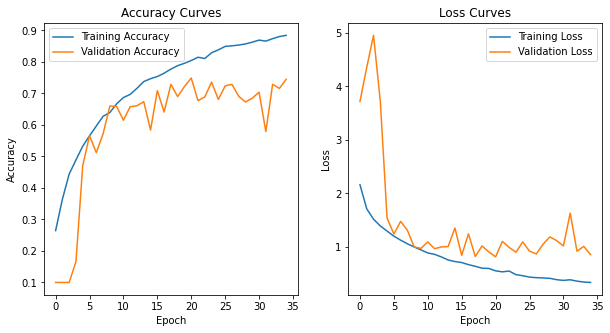

In [17]:
#Creating an instance of the Sequential class, passing the constructor a list of the layers
modelD = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(32, [3,3], input_shape=(32,32,3),activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(32, [3,3], activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, [3,3],activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, [3,3], activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128, [3,3], activation=tf.nn.relu, padding='same'),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128, [3,3], activation=tf.nn.relu, padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, kernel_constraint=maxnorm(3), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(128, kernel_constraint=maxnorm(3), activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(number_class, activation=tf.nn.softmax)])

#Compile the model by passing in values for the arguments optimizer(Adam), loss(CategoricalCrossentropy), and metrics(CategoricalAccuracy).
modelD.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=tf.keras.metrics.CategoricalAccuracy())

#Training the deep model with the training dataset
historyD = modelD.fit(trn_images, trn_labels, validation_data=(tst_images, tst_labels), epochs=35, batch_size=64)

#Plotting the accuracy and loss curves of the training and validation data
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(historyD.history['categorical_accuracy'])
plt.plot(historyD.history['val_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(historyD.history['loss'])
plt.plot(historyD.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

### Evaluation of the created <font color='red'>deep</font> model on the training and testing data, and displaying the confusion matrix


Accuracy on train data: 0.9807999730110168% 
 Error on train data: 0.019200026988983154

Accuracy on test data: 0.7450000047683716% 
 Error on test data: 0.2549999952316284



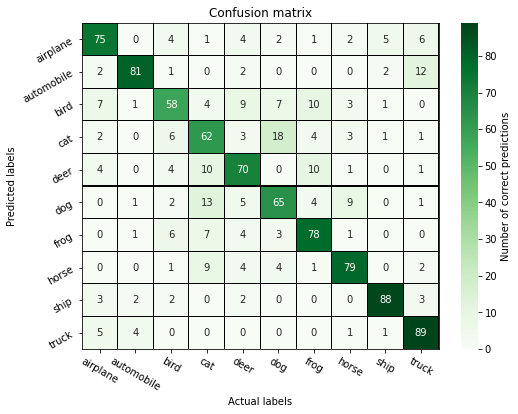


              precision    recall  f1-score   support

           0       0.77      0.75      0.76       100
           1       0.90      0.81      0.85       100
           2       0.69      0.58      0.63       100
           3       0.58      0.62      0.60       100
           4       0.68      0.70      0.69       100
           5       0.66      0.65      0.65       100
           6       0.72      0.78      0.75       100
           7       0.80      0.79      0.79       100
           8       0.90      0.88      0.89       100
           9       0.77      0.89      0.83       100

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



In [18]:
#Evaluation of the training data which outputs the overall accuracy of the training dataset
scoresD = modelD.evaluate(trn_images, trn_labels, batch_size=64, verbose=0)
print("")
print('Accuracy on train data: {}% \n Error on train data: {}'.format(scoresD[1], 1 - scoresD[1]))

#Evaluation of the testing data which outputs the overall accuracy of the testing dataset
scoresD2 = modelD.evaluate(tst_images, tst_labels, batch_size=64, verbose=0)
print("")
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scoresD2[1], 1 - scoresD2[1]))

#Using the trained model to predict the categories of the testing images
pred_testD= modelD.predict(tst_images)

#Creating and displaying the confusion matrix using heatmap
cfmxD = metrics.confusion_matrix(tst_labels.argmax(axis=1), pred_testD.argmax(axis=1), labels=[0,1,2,3,4,5,6,7,8,9])
print("")
plt.figure(figsize=(8,6))
mapD = sn.heatmap(cfmxD, linewidths=0.1, linecolor='Black', xticklabels=label_names, yticklabels=label_names, annot=True, cmap='Greens', cbar_kws={'label': 'Number of correct predictions'})
mapD.set_xticklabels(mapD.get_xticklabels(), rotation=-30)
mapD.set_yticklabels(mapD.get_yticklabels(), rotation=30)

#Going through each side of the frame of the heatmap and set the frame on
for _, spine in mapD.spines.items():
    spine.set_visible(True)

plt.title('Confusion matrix')
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.show()

#Dispaying the classification report for the testing dataset
print("")
print(metrics.classification_report(tst_labels.argmax(axis=1), pred_testD.argmax(axis=1), labels=[0,1,2,3,4,5,6,7,8,9]))

#### 